<a href="https://colab.research.google.com/github/AdrianCCT/Fundamental-of-Statistics-of-DA/blob/main/Adrian_Tomal_CA2_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Overview

### Importing Data and libraires

In [ ]:
#imoprting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [ ]:
# Importing csv from google drive

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Data Files/CAs/garments_worker_productivity.csv'

my_data_set_name_is_not_data_set_or_df = pd.read_csv(file_path)

Mounted at /content/drive


### Checking basic data features, to veriy accuracy of the data before using it for my reaserch.

In [ ]:
# I am looking at the columns headers and layout using 'head().
my_data_set_name_is_not_data_set_or_df.head()

,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,sweing,Thursday,8,0.8,26.16,1108,7080,98,0.0,0,0,59.0,0.940725
1,sweing,Thursday,11,0.8,11.41,968,3660,50,0.0,0,0,30.5,0.800570
2,sweing,Thursday,12,0.8,11.41,968,3660,50,0.0,0,0,30.5,0.800570
3,sweing,Thursday,6,0.8,25.90,1170,1920,50,0.0,0,0,56.0,0.800382
4,sweing,Thursday,7,0.8,25.90,984,6720,38,0.0,0,0,56.0,0.800125


In [ ]:
# I would like to check for null values. We can confirm that there are none, as the number of non-null values matches the total number of observations in the dataset in all variables.
# Additionally, I will verify the data types of the columns to ensure that columns representing numbers are in the correct format. We can see that they are: int64 for numerical values without decimals and float64 for numerical values with decimals.
my_data_set_name_is_not_data_set_or_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   department             691 non-null    object 
 1   day                    691 non-null    object 
 2   team                   691 non-null    int64  
 3   targeted_productivity  691 non-null    float64
 4   smv                    691 non-null    float64
 5   wip                    691 non-null    int64  
 6   over_time              691 non-null    int64  
 7   incentive              691 non-null    int64  
 8   idle_time              691 non-null    float64
 9   idle_men               691 non-null    int64  
 10  no_of_style_change     691 non-null    int64  
 11  no_of_workers          691 non-null    float64
 12  actual_productivity    691 non-null    float64
dtypes: float64(5), int64(6), object(2)
memory usage: 70.3+ KB


In [ ]:
#The describe function provides a statistical summary of numerical columns, like count, mean, standard deviation, min, max, and percentiles. It helps understand data distribution, detect anomalies, and understand variable ranges.
# I cant see anomalies here, In general data sets looks well(regurarly) disrtibuted,means are very close to medians apart from over_time and incentive show high variability, as expected.
my_data_set_name_is_not_data_set_or_df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,6.520984,0.723980,23.245412,1190.465991,6508.205499,44.483357,1.264834,0.639653,0.260492,52.445731,0.722013
std,3.458333,0.102006,6.976497,1837.455001,2864.505604,27.596591,16.712923,4.283652,0.537185,9.417353,0.154784
min,1.000000,0.070000,10.050000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.233705
25%,4.000000,0.700000,18.790000,774.500000,4560.000000,30.000000,0.000000,0.000000,0.000000,52.000000,0.661470
50%,6.000000,0.750000,22.520000,1039.000000,6840.000000,45.000000,0.000000,0.000000,0.000000,57.000000,0.750608
75%,10.000000,0.800000,28.080000,1252.500000,7200.000000,60.000000,0.000000,0.000000,0.000000,58.000000,0.800402
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,138.000000,300.000000,45.000000,2.000000,89.000000,1.100484


In [ ]:
#making data set description shorter for easier use
df = my_data_set_name_is_not_data_set_or_df

In [ ]:
df.shape

(691, 13)

In [ ]:
# I woudl like to check uniqe values for text Variables
# we can see in the results below that Friday is missing. (we can assume that Firday is missing or factory is closed, I come back to it later)
print(df['department'].unique())
print(df['day'].unique())

['sweing']
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


In [ ]:
#I want to check the number of observations for each day. The results show they are fairly even, making it suitable to use data from each day for further analysis. If one day had significantly more or fewer observations, it might not be good to compare days effectively
day_counts = df['day'].value_counts()
day_counts

,count
day,
Wednesday,119
Thursday,118
Tuesday,118
Sunday,116
Monday,116
Saturday,104


### I’m happy with the data as it is, except for the missing Friday (I’ll address this later).

### As first question is based on 'over_time' column I want to have clser look at data , and data distribution

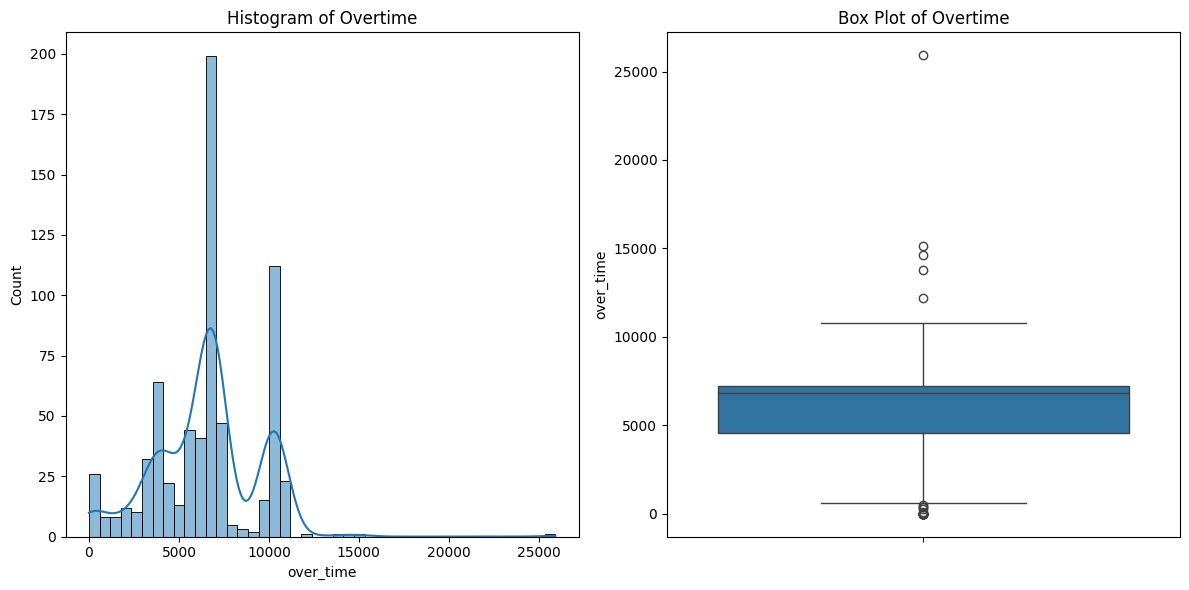

In [ ]:
# I use histogram and box plot to have visual loook at the data
# The data is highly skewed to the right, which is expected for overtime data. I am comfortable using it As Is and keeping the outliers, as they appear to be accurate records rather than anomalies.

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['over_time'], kde=True)
plt.title('Histogram of Overtime')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['over_time'])
plt.title('Box Plot of Overtime')

plt.tight_layout()
plt.show()

In [ ]:
# I watn to quickly check Top 10 'over_time' values(outliers), to double check that values are correct . Everything looks ok

top_10_overtime = df.nlargest(10, 'over_time')
top_10_overtime

,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
82,sweing,Thursday,11,0.35,12.52,287,25920,38,0.0,0,0,54.0,0.349951
79,sweing,Thursday,12,0.80,11.61,548,15120,63,0.0,0,0,31.5,0.800107
80,sweing,Thursday,6,0.80,11.41,411,14640,50,0.0,0,0,30.5,0.800025
22,sweing,Saturday,4,0.70,23.69,544,13800,0,0.0,0,0,60.0,0.700134
218,sweing,Thursday,1,0.70,22.94,1384,12180,63,0.0,0,0,57.0,0.750162
224,sweing,Thursday,8,0.80,40.99,980,10770,30,0.0,0,0,56.5,0.555500
48,sweing,Tuesday,1,0.80,26.16,1187,10620,75,0.0,0,0,59.0,0.850502
49,sweing,Tuesday,9,0.80,26.16,1305,10620,75,0.0,0,0,59.0,0.850502
60,sweing,Wednesday,1,0.80,26.16,1179,10620,75,0.0,0,0,59.0,0.850502
61,sweing,Wednesday,9,0.80,26.16,1324,10620,75,0.0,0,0,59.0,0.850502


In [ ]:
# I want to check the mean for each day for over_time to identify any possible abnormalities on specific days.
daily_overtime_mean = df.groupby('day')['over_time'].mean()

daily_overtime_mean

,over_time
day,
Monday,6326.379310
Saturday,6935.384615
Sunday,6694.396552
Thursday,6806.186441
Tuesday,6310.169492
Wednesday,6031.512605


### I am happy to use the data for hypothesis testing.Since I have no information on whether the factory is closed on Friday, I will use linear interpolation to predict Friday's mean. Since I noticed that overtime increases toward the end of the week and is lower at the start, linear interpolation is likely to provide a prediction close to the real results. Then, I will perform hypothesis testing using the mean from the 6 existing days and all 7 days, comparing the results.

In [ ]:
# I will assign numbers to each day of the week, to prepare data for interpolation , and sort data .

day_mapping = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5,
    'Saturday': 6, 'Sunday': 7
}

# I will create new column 'day_number' that will allow me to assign numbers to weekdays based on the mapping, also I will use it later in Matrix Analysis
df['day_number'] = df['day'].map(day_mapping)

# I Group data by day number and calculate the mean of 'over_time' for each day (whcih I did already above, just for the step clarification)
daily_overtime_mean = df.groupby('day_number')['over_time'].mean()

# now time to sort the days by day number for linear interpolation calcuation.
daily_overtime_mean = daily_overtime_mean.sort_index()

# Calcaulating possibly missing Friday (nubmer 5 below) over_time mean value using linear interpolation
friday_overtime = np.interp(5, daily_overtime_mean.index,daily_overtime_mean.values) ##1 Stack Overflow. (2011) How to implement linear interpolation? [Online]. Available at: https://stackoverflow.com/questions/7343697/how-to-implement-linear-interpolation (Accessed: 24 November 2024).

print(f"Estimated Friday overtime : {friday_overtime}")

Estimated Friday overtime : 6870.785528031291


In [ ]:
# I will calculate now the overtime mean for 7 days, using predicted Friday's mean.

# I Calculate the sum of the mean overtime for each 6 days , add Friday's mean to the sum and get 7 days average over_time mean
_7Days_mean_overtime = (daily_overtime_mean.sum()+friday_overtime)/7
_6days_mean_overtime = df['over_time'].mean()

print(_7Days_mean_overtime)
print(_6days_mean_overtime)

6567.830648961469
6508.205499276411


In [ ]:
#The difference is insignificant; however, I check both in the hypothesis testing question below

# QUESTION 1
## The company believes implemented new machines and they believe this would reduce the average overtime (in minutes) that the workers will do, which will lead to a cost reduction in the end. They tried it in a group of 200 workers, which shows an average overtime of 6300 minutes. Can we say that the company is right? Formulate an appropriate hypothesis and justify your answer.

In [ ]:
from scipy import stats

### Null Hypothesis (H0) : The implementation of the new machines do not reduce the average overtime

### Alternative Hypothesis (H1) : The implementation of the new machines reduce the average overtime


In [ ]:
# Based on my hypothesis, I will perform a one-sided test using a 5% significance level, allowing only a 5% chance that the result occurred by random chance
# I will assign values correct mathematical abreavations

X_bar = 6300  # Sample mean (from 200 workers test)
n = 200       # Sample size (number of workers in the test)
mu = df['over_time'].mean() # Population mean (historical mean of 'over_time' from our data set)
mu2 = _7Days_mean_overtime # Population mean using assumption that friday is missing, using linear interpolation to predict Friday's over_time that change mean for the data set.
s = df['over_time'].std()    # Population standard deviation (from our data set)

# my sygnificance level
alpha = 0.05

# I will use the t-statistic instead of z-score as we do not know the population size  (this values is needed to calculate pvalue to verify our hypothesis)

t_stat = (X_bar - mu) / (s / np.sqrt(n))

# I will now calculate the degree of freedom. We calculate it to improve the accuracy of the data. One number needs to be fixed to match the average, while the other numbers can vary, but their average must equal the given mean
DF = n - 1

# To calculate the p-value, I use the CDF because it helps determine the probability that a t-value from the distribution is less than or equal to the observed t-statistic, as I am performing a left-tail test.
# I use the p-value to decide whether to reject or fail to reject the hypothesis. If the p-value is larger than alpha, I fail to reject the null hypothesis. If it is higher, I reject the null hypothesis and accept the alternative hypothesis.

p_value = stats.t.cdf(t_stat, DF)

# also I will do quick calcuations for mu2 that includes predcited friday (using same methods as above)

t_stat2 = (X_bar - mu2) / (s / np.sqrt(n))
p_value2 = stats.t.cdf(t_stat2, DF)

print(t_stat,p_value)
print(t_stat2,p_value2)




-1.027915743770346 0.15261862501664464
-1.322286595159663 0.09379524707038722


Lets analyze the results,

# Analysis:

### Without Friday:
The test statistic is negative, suggesting a potential reduction in overtime. However, the p-value (0.1526) is greater than significance level (α = 0.05), indicating insufficient evidence to reject the null hypothesis.


### With Predicted Friday:
The test statistic becomes slightly more negative, which may indicate that including the predicted data improve the observed trend for reduced overtime. However, the p-value (0.0938) is still greater than α = 0.05.


### Conclusions:
Regardless of whether Friday is excluded or interpolated, the p-value remains above α = 0.05, meaning **we fail to reject the null hypothesis in both cases** ,
There is not enough evidence that The implementation of the new machines reduce the average overtime

# QUESTION 2

## Formulate an appropriate analysis to determine the real average productivity of these workers each day of the week. Is there any difference between the days? Along with your results, provide a possible explanation on the outcome.

In [ ]:
# I need to import additionl libraires to performm further analysis required to answear question 2
import scipy.stats as stats
from scipy.stats import levene
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm

## Visual Review

<Axes: xlabel='actual_productivity', ylabel='day'>

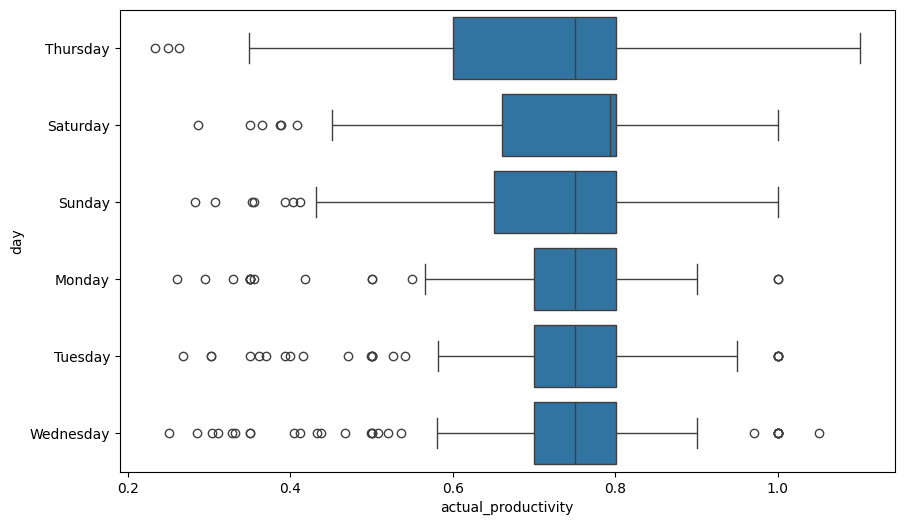

In [ ]:
# I will use box plot visualization to check outliers and data distribution across each day actual_productivity column

plt.figure(figsize=(10,6))
sns.boxplot(x='actual_productivity',y='day',data=df)

### The box plot shows that the mean productivity is fairly consistent across all days, despite slight variations in the median and spread. Outliers are present, but I consider them a normal part of production line, as anomalies frequently occur in this type of environment. While I could analyze the impact of removing these outliers on productivity, for accurately measuring real productivity, it is essential to keep them.

<Figure size 640x480 with 0 Axes>

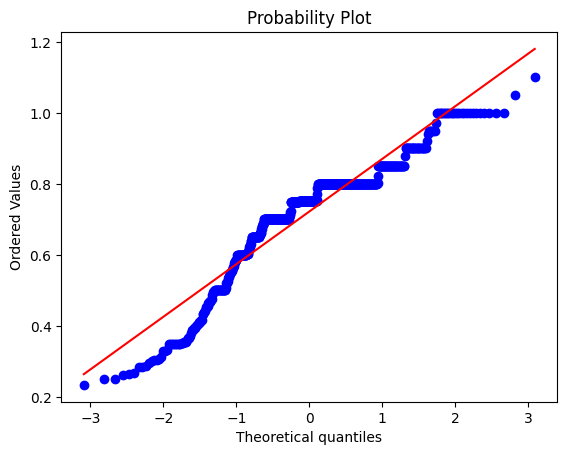

<Figure size 640x480 with 0 Axes>

In [ ]:
# I will use Q-Q plot visualization to check normality and data distribution

stats.probplot(df['actual_productivity'],plot=plt)
plt.figure()

### The Q-Q plot suggests that the distribution of the actual_productivity data deviates slightly from a perfect normal distribution, especialy in the tails. But, the center of QQ plot  aligns reasonably well . This suggests that, while the data might not strictly follow a normal distribution, it could still be  normal for practical purposes.

Next Steps:

1.   Shapiro-Wilk Test: This test will show whether the data is normally distributed
2.   Levene’s Test: This will check variances across groups, a key assumption for ANOVA.
3.   ANOVA:  will show whether there are significant differences between the group means.


Conclusion:
While the Q-Q plot distribution does not waranty normality, the follow-up tests (Shapiro, Levene, ANOVA) will give more analysis to confirm or challenge type of distribution and difference between each day.

## Statstical Tests

In [ ]:
# I will perfrom shaphiro test

# Null Hypothesis H0: The data for actual_productivity on the given day follows a normal distribution.
# Alternative Hypothesis (H1): The data for actual_productivity on the given day does not follow a normal distribution.
# this is how we gonna intepretate the test : If p-value > 0.05:Fail to reject H0 , data can be assumed normally distributed. If p-value ≤ 0.05 Reject H0 it means the data does not foloow normal dist

days = df['day'].unique()
for day in days:
    day_data = df[df['day'] == day]['actual_productivity']
    shapiro_test = stats.shapiro(day_data)
    print(f"Shapiro-Wilk Test for {day}:")
    print(f"Statistic: {shapiro_test.statistic}")
    print(f"P-value: {shapiro_test.pvalue}")


Shapiro-Wilk Test for Thursday:
Statistic: 0.9448016154685062
P-value: 0.00010524227225556716
Shapiro-Wilk Test for Saturday:
Statistic: 0.9101538658029198
P-value: 2.9793722596295404e-06
Shapiro-Wilk Test for Sunday:
Statistic: 0.9442652950602765
P-value: 0.00011122691951572891
Shapiro-Wilk Test for Monday:
Statistic: 0.8328640097825084
P-value: 3.923383209352012e-10
Shapiro-Wilk Test for Tuesday:
Statistic: 0.8985324559458889
P-value: 2.001336249833521e-07
Shapiro-Wilk Test for Wednesday:
Statistic: 0.887329960656262
P-value: 5.1426826776564324e-08


### For all the days ( Monday, Tuesday, Wednesday,Thursday, Saturday, Sunday) the p-value is below 0.05, leading to rejection of the null hypothesis. Thus, for each day, we conclude that the 'actual_productivity' data does not follow a normal distribution.

In [ ]:
# Levene's test, this will check across each day if porductivity variance is equal or not, a key assumption for ANOVA.
# Null Hypothesis H0 : The variances of actual_productivity across the groups are equal
# Alternative Hypothesis H1 : The variances of actual_productivity across the groups are not equal.

days = df['day'].unique()
group_data = [df[df['day'] == day]['actual_productivity'] for day in days]
levene_test = levene(*group_data, center='mean') # 2.GeeksforGeeks (2021) Packing and unpacking arguments in Python. Available at: https://www.geeksforgeeks.org/packing-and-unpacking-arguments-in-python (Accessed: 24 November 2024).
levene_test

LeveneResult(statistic=0.9656409528402914, pvalue=0.4380143378422362)

### The Levene's Test for equality of variances resulted in a p-value of 0.438, which is greater than the significance level (0.05). This means we fail to reject the null hypothesis, indicating that the variances of 'actual_productivity' across the days of the week are approximately equal. In this case I can pefrom ANOVA to test for differences in means.

In [ ]:
# Final step is ANOVA test
# Null Hypotheis : There is no sigificant defference in the means across the days
# Alternative Hypotheis : At least one day mean is significantly different.
# I use one-way ANOVA becasue there is only one independent variable (day of the week), impcating dependent variable (actual_productivity)

model = ols('actual_productivity ~ C(day)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

             sum_sq     df        F  PR(>F)
C(day)     0.043356    5.0  0.36025  0.8757
Residual  16.487793  685.0      NaN     NaN


### The high p-value indicates that there is no significant difference in mean actual_productivity across the days of the week. We fail to reject the null hypothesis, suggesting that the day of the week does not significantly affect productivity.

# Analysis Summary

## The analysis looked at whether workers productivity differs between days of the week. Tests showed the data isn’t perfectly normal, but the variances between days are similar. When we compared productivity across days using ANOVA, the results showed no significant differences (p = 0.8757). **This means there is no difference in productivity across different days of the week**, likely because the nature of their tasks and workload doesn’t change much throughout the week.

# QUESTION 3

## Use some variables of the dataset to perform regression analysis. You should identify the key variables that influence employee’s productivity
(Apply regression analysis to appropriate datasets and demonstrate an awareness of the limitations of regression models.)

### Linear Regression

In [ ]:
# I want to split the data into weekdays and weekends for further analysis. While I understand that days may not impact productivity, I want to check if they influence overtime in subsequent analyses.

day_mapping = {
    'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0,
    'Saturday': 1, 'Sunday': 1
}
# Creating a new column 'is_weekend' based on the mapping
df['is_weekend'] = df['day'].map(day_mapping)
# Spliting data by assigninh to weekend 1 and 0 to weekdays
weekdays = df[df['is_weekend'] == 0]
weekends = df[df['is_weekend'] == 1]


In [ ]:
df.head(1)

,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,day_number,is_weekend
0,sweing,Thursday,8,0.8,26.16,1108,7080,98,0.0,0,0,59.0,0.940725,4,0


In [ ]:
# importing libriaries required for regressions.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# I am gonna define predictors (independent variables) in the first stage i use all varaibles  ,  and target (dependent variable) 'actual_productivity'
# later base on the Coefficient and P-value results I will select the key variables that influence productivity.
predictors = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
              'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers','team','day_number','is_weekend'  ]
X = df[predictors]
y = df['actual_productivity']

# Spliting dataset into train and test sets to create my model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now I am gonna use linear regression as per question 3 requirements
model = LinearRegression()
model.fit(X_train, y_train)

# Now below codes will allow to male all calculations/predictions and check model accuracy
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Now I also need P-value , to check how probable is my coeficient , and to help me select the key variables by their significance.
X_with_const = sm.add_constant(X)  # Adding constant for intercept
model_sm = sm.OLS(y, X_with_const).fit()

# this code will calculate coefficients and p-values, to be displayed
results = pd.DataFrame({
    'Predictor': ['Intercept'] + predictors,
    'Coefficient': model_sm.params.values,
    'P-value': model_sm.pvalues.values
})

# I will Format coefficients and p-values to be displayed in regular numerical format rather than Scientific (E+....)
results['Coefficient'] = results['Coefficient'].map("{:.6f}".format)
results['P-value'] = results['P-value'].map("{:.6f}".format)

# Display MSE, R-squared, and regression results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("\nRegression Results:")
print(results.sort_values(by='Coefficient'))

Mean Squared Error: 0.004101101613211397
R-squared: 0.802797978215328

Regression Results:
                Predictor Coefficient   P-value
3                     wip   -0.000001  0.730386
4               over_time   -0.000003  0.003403
10                   team   -0.002938  0.000594
2                     smv   -0.003184  0.000000
11             day_number   -0.003201  0.248655
7                idle_men   -0.006029  0.000000
6               idle_time    0.000650  0.000718
9           no_of_workers    0.001236  0.001025
5               incentive    0.003109  0.000000
8      no_of_style_change    0.003930  0.481576
12             is_weekend    0.008747  0.482329
0               Intercept    0.177638  0.000000
1   targeted_productivity    0.644515  0.000000


### The regression analysis shows that around 80% of the variation in actual productivity is explained by the independent variables (R2 = 0.8028) with a mean squared error of 0.0041, indicating the model is a strong fit. Among the factors, targeted productivity has the most significant positive effect (Coefficient=0.6445,p<0.001), meaning higher targets lead to better productivity. Financial incentives also play a positive role (Coefficient=0.0031,p<0.001), while idle workers (Coefficient=-0.0060,p<0.001) and tasks requiring longer standard minutes (Coefficient=-0.0032,p<0.001) reduce efficiency. Overtime has a slight but significant negative impact (Coefficient=-0.000003,p=0.003), suggesting that prolonged work hours may lead to smaller returns. Other factors like work in progress (p=0.73) and style changes (p = 0.48) show minimal influence, as indicated by their high p-values. Overall, the model identifies targeted productivity and financial incentives as key drivers of success while highlighting inefficiencies caused by idle workers.

### To better understand what are the most important features I will use Random Forest and RFE, and also do some correlation for furhter use in report

### Feature Selection

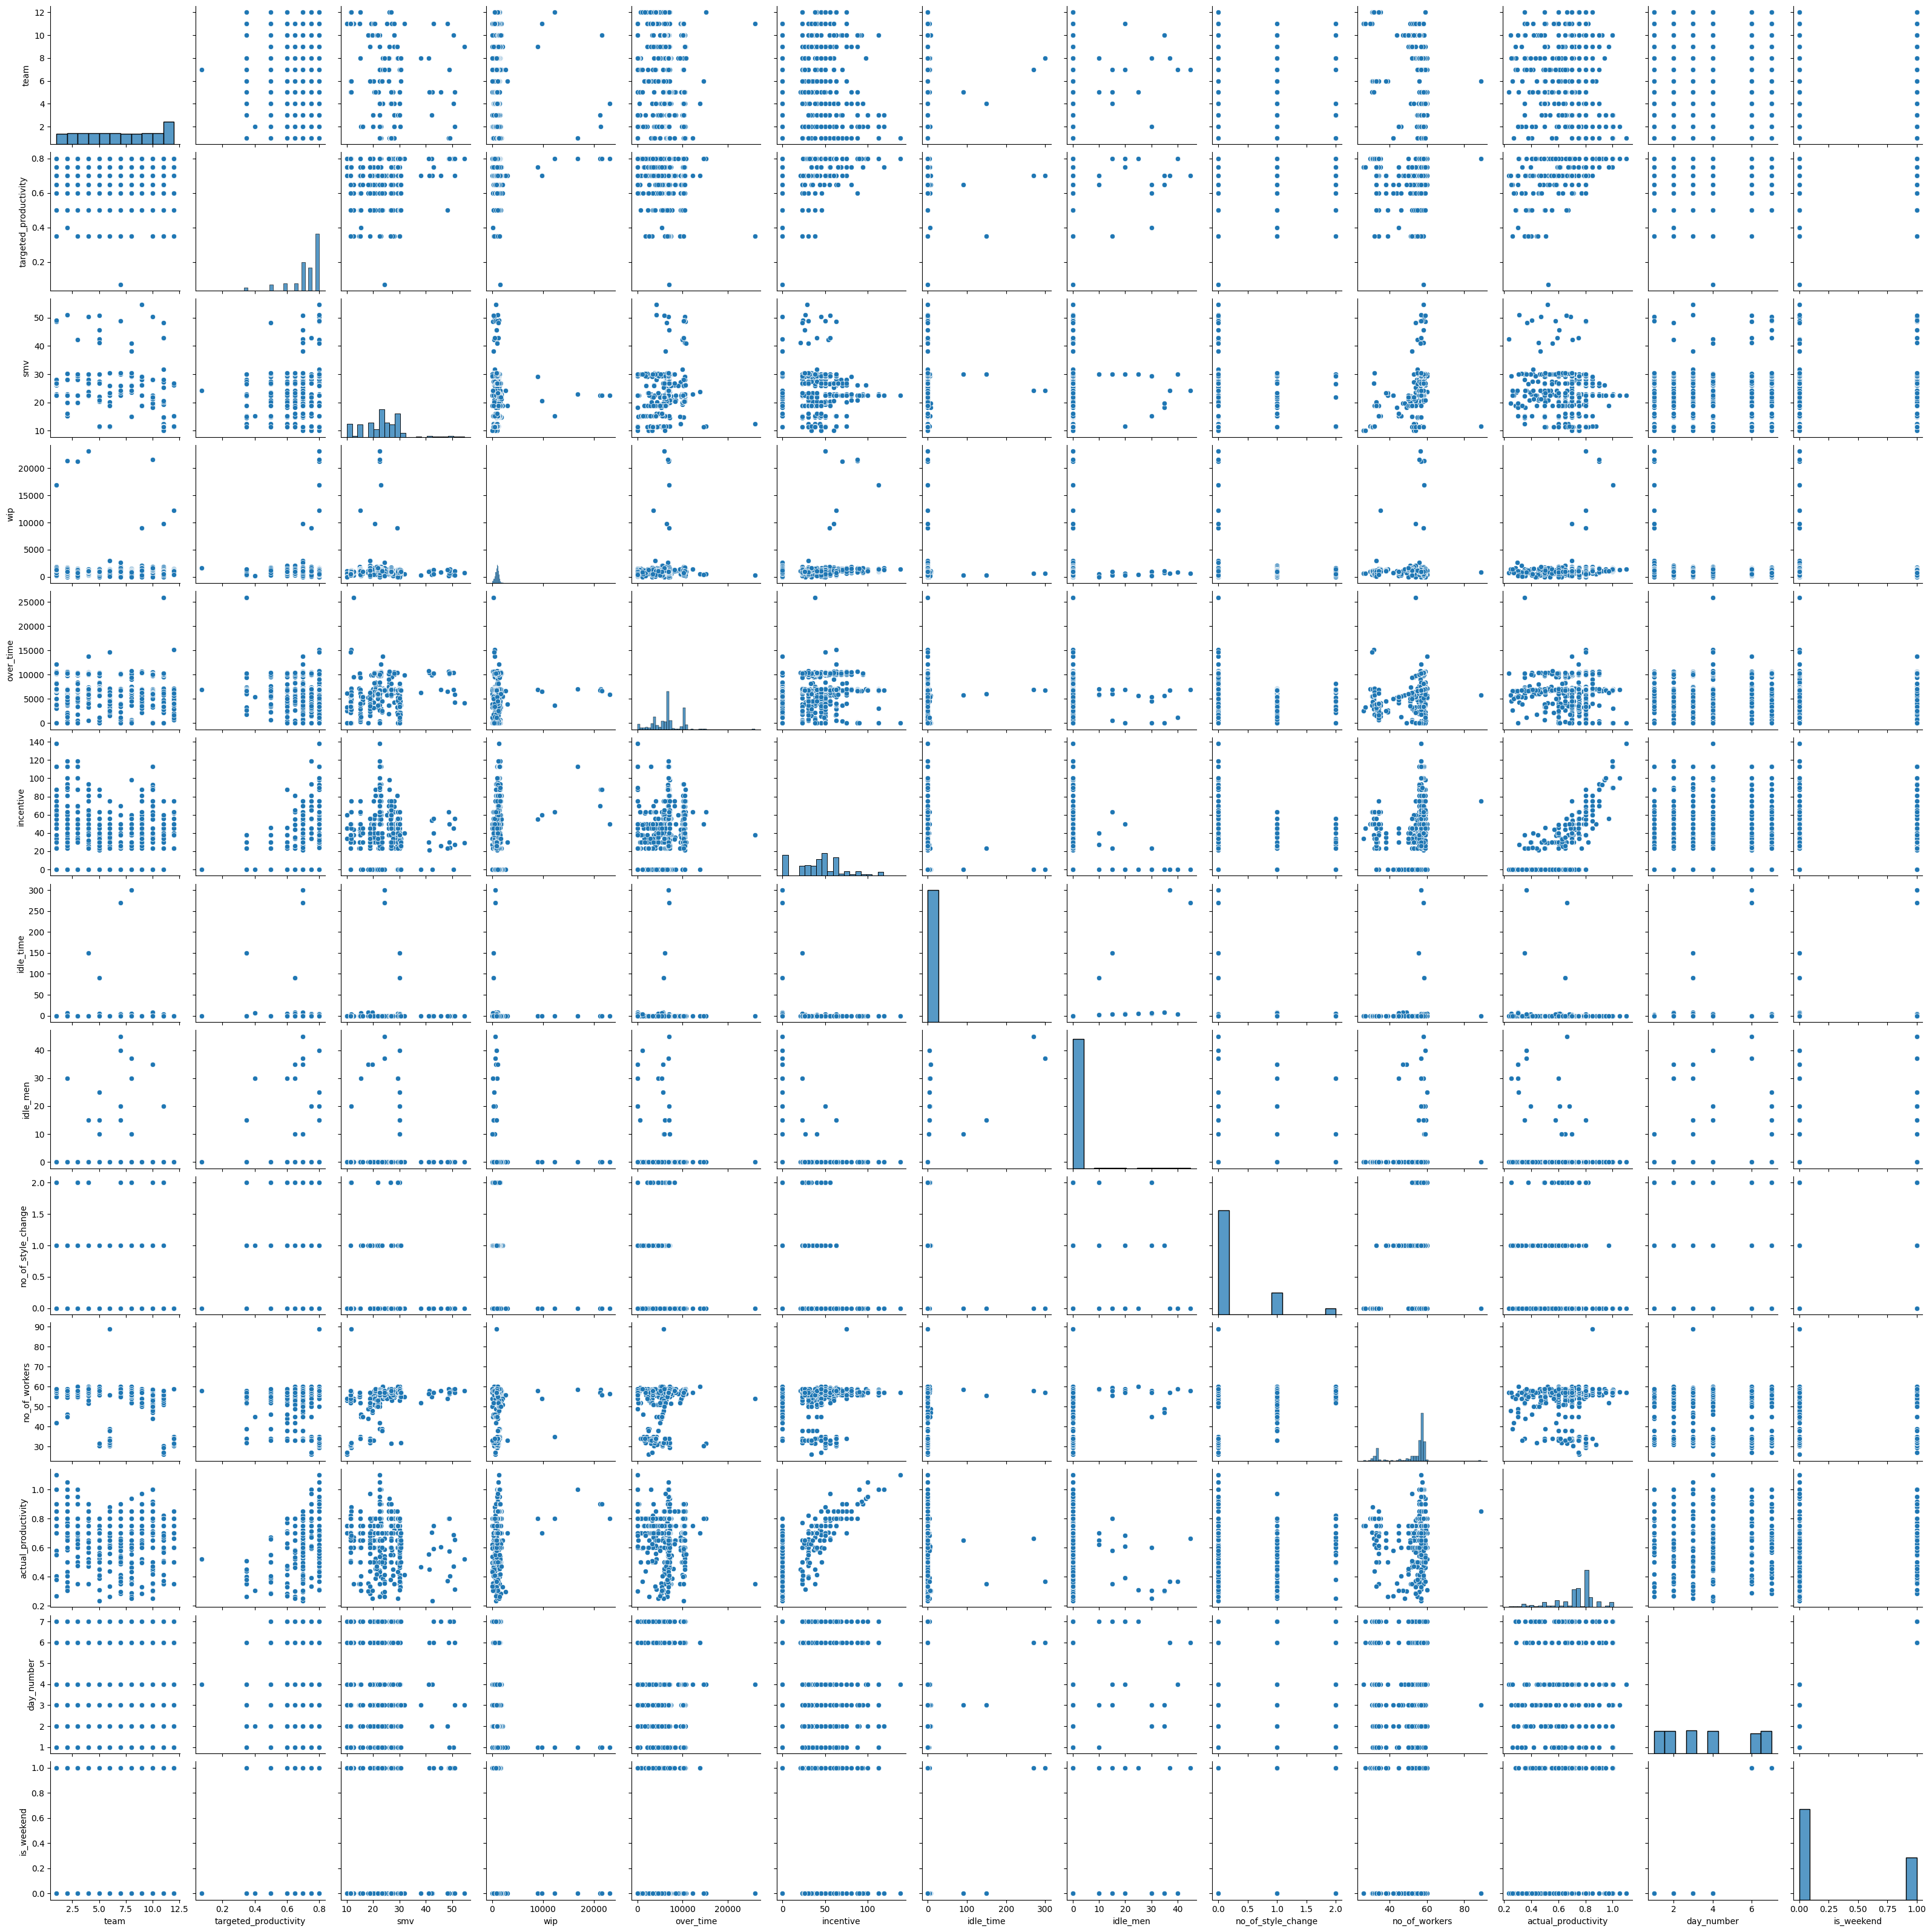

In [ ]:
# revieng plots to visualize correlation , we can straight away see that asome of the variables are not suitable for variable , e.g. 'wip'. , however I am going to use other methods that will simplify me selcetion.
sns.pairplot(df)


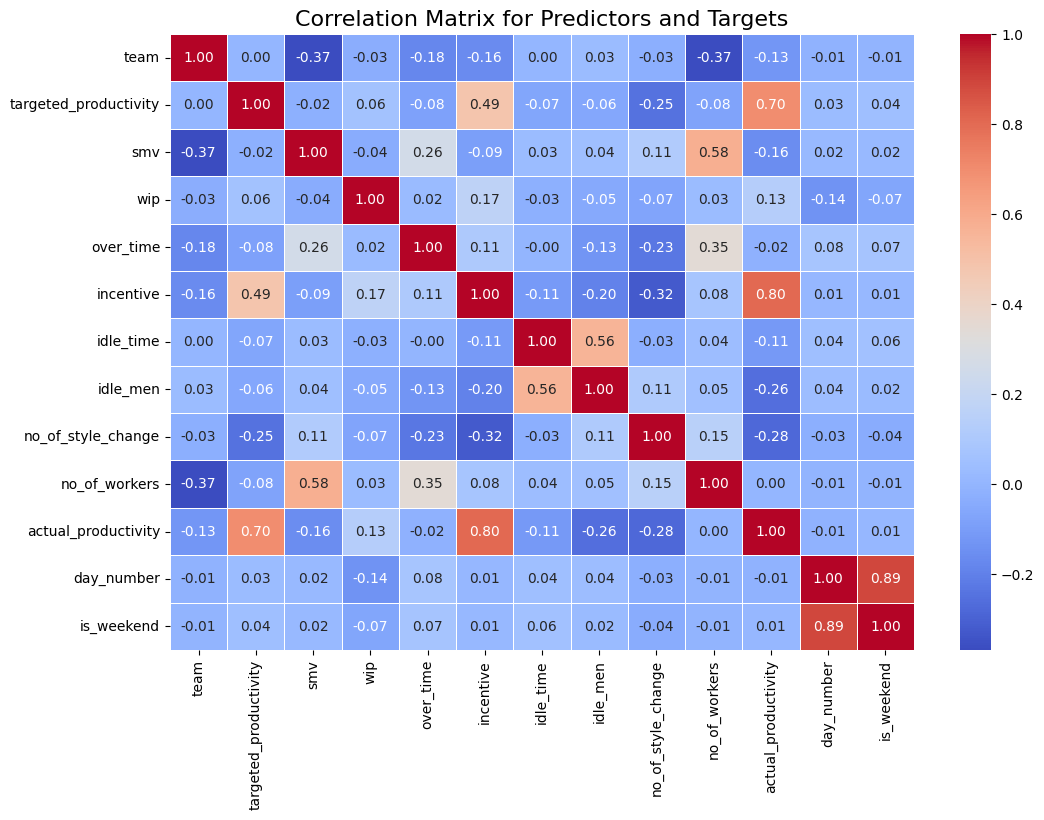

In [ ]:
# for better undersatanding of the selecting key variables and finale analyzis and report I also use Correlation Matrix

# First, I need to remove non-numerical columns. The "day" column has already been transformed to float64, and a new column was created. Additionally, the "department" column holds only a single repetitive value, so it has no analytical value and will also be removed.
df_corr = df.drop(columns=df.columns[:2])

# create the correlation matrix
correlation_matrix = df_corr.corr()

# I will create the heatmap , that will be usde in my report and support my fature selection
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Predictors and Targets', fontsize=16)
plt.show()

In [ ]:
# I woudl like to see actual corealtion values correlation_matrix
correlation_matrix = df_corr.corr()
print(correlation_matrix['actual_productivity'].sort_values(ascending=False))

actual_productivity      1.000000
incentive                0.804149
targeted_productivity    0.697970
wip                      0.131147
is_weekend               0.005487
no_of_workers            0.003378
day_number              -0.012037
over_time               -0.016875
idle_time               -0.113737
team                    -0.125099
smv                     -0.155676
idle_men                -0.258357
no_of_style_change      -0.281686
Name: actual_productivity, dtype: float64


### The correlation results show that incentive (0.804) and targeted productivity (0.698) are the strongest positive drivers of productivity, while variables like idle men (−0.258) and style changes (−0.282) have the most negative impacts. Other factors, such as wip (0.131), have minor positive correlations, while idle time (−0.114) and smv (−0.156) exhibit weaker negative effects. Overall, productivity is primarily driven by incentives and targeted planning but is impacted by inefficiencies and interruptions base on correlation.

In [ ]:
# importing libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

In [ ]:
#choosing my independent variables as predictors X , piking my dependent variable y

predictors = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
              'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers','team']
X = df[predictors]
y = df['actual_productivity']

# Feature importance using Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)
feature_importances = pd.DataFrame({
    'Feature': predictors,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Recursive Feature Elimination (RFE) using Linear Regression
lr_model = LinearRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=5)
rfe.fit(X, y)

rfe_results = pd.DataFrame({
    'Feature': predictors,
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

# Print results
print("Feature Importance (Random Forest):")
print(feature_importances)

print("\nFeature Selection (RFE):")
print(rfe_results)
##### ***** 3,4,5,6 - please see references below

Feature Importance (Random Forest):
                 Feature  Importance
4              incentive    0.692793
0  targeted_productivity    0.128611
2                    wip    0.050786
1                    smv    0.033192
3              over_time    0.030059
8          no_of_workers    0.021050
6               idle_men    0.019103
9                   team    0.014175
7     no_of_style_change    0.005677
5              idle_time    0.004553

Feature Selection (RFE):
                 Feature  Selected  Ranking
0  targeted_productivity      True        1
4              incentive      True        1
6               idle_men      True        1
7     no_of_style_change      True        1
9                   team      True        1
1                    smv     False        2
8          no_of_workers     False        3
5              idle_time     False        4
3              over_time     False        5
2                    wip     False        6


REFERENCES for above code

3. Random Forest Regressor:

Breiman, L. (2001). Random forests. Machine Learning, 45(1), 5-32. DOI: 10.1023/A:1010933404324.
Scikit-learn developers. (2024). RandomForestRegressor. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html [Accessed 24 Nov. 2024].

4. Recursive Feature Elimination (RFE):

Guyon, I., Weston, J., Barnhill, S., and Vapnik, V. (2002). Gene selection for cancer classification using support vector machines. Machine Learning, 46(1), 389-422. DOI: 10.1023/A:1012487302797.
Scikit-learn developers. (2024). RFE. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html [Accessed 24 Nov. 2024].

5. Linear Regression:

Draper, N.R. and Smith, H. (1998). Applied Regression Analysis. 3rd ed. Wiley-Interscience.
Scikit-learn developers. (2024). LinearRegression. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html [Accessed 24 Nov. 2024].

6. Scikit-learn Library:

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M. and Duchesnay, É. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830. [online] Available at: https://jmlr.org/papers/v12/pedregosa11a.html [Accessed 24 Nov. 2024].

<ipython-input-34-2c37f0ef9bcc>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_sorted.values, y=correlation_sorted.index, palette="mako")


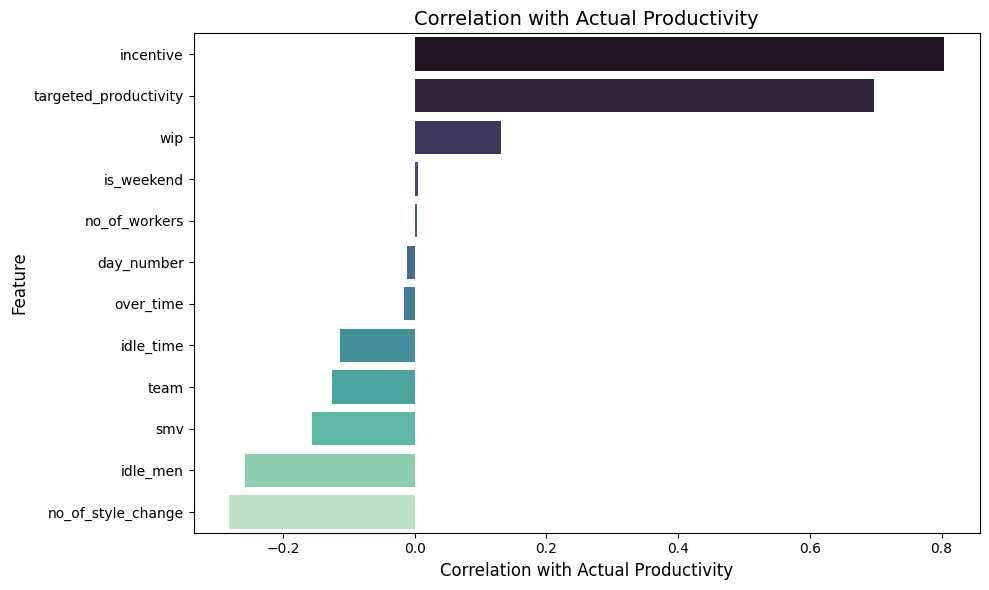

<ipython-input-34-2c37f0ef9bcc>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importances_sorted, palette="viridis")


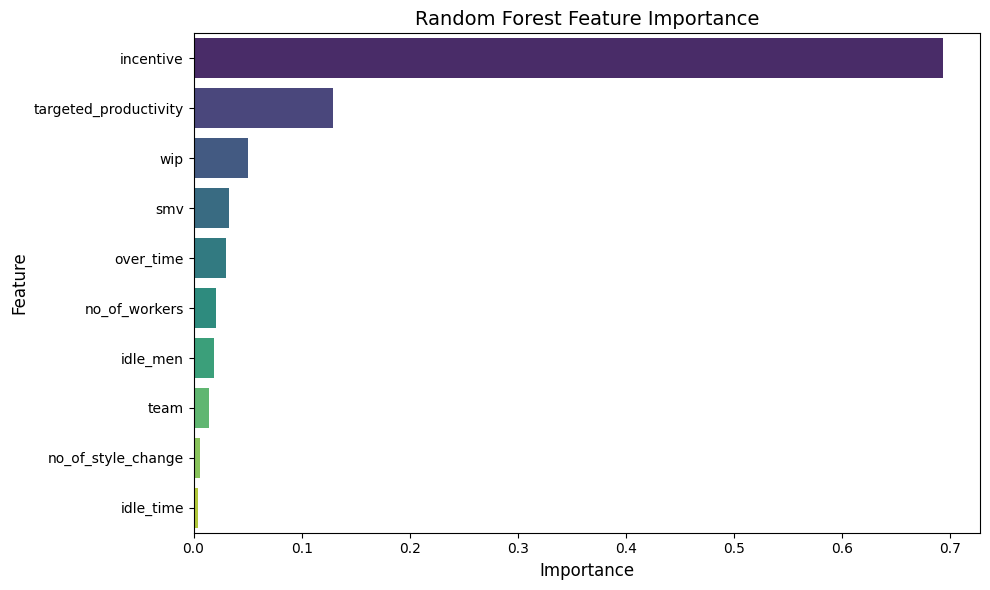

<ipython-input-34-2c37f0ef9bcc>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ranking", y="Feature", data=rfe_results.sort_values(by="Ranking"), palette="coolwarm")


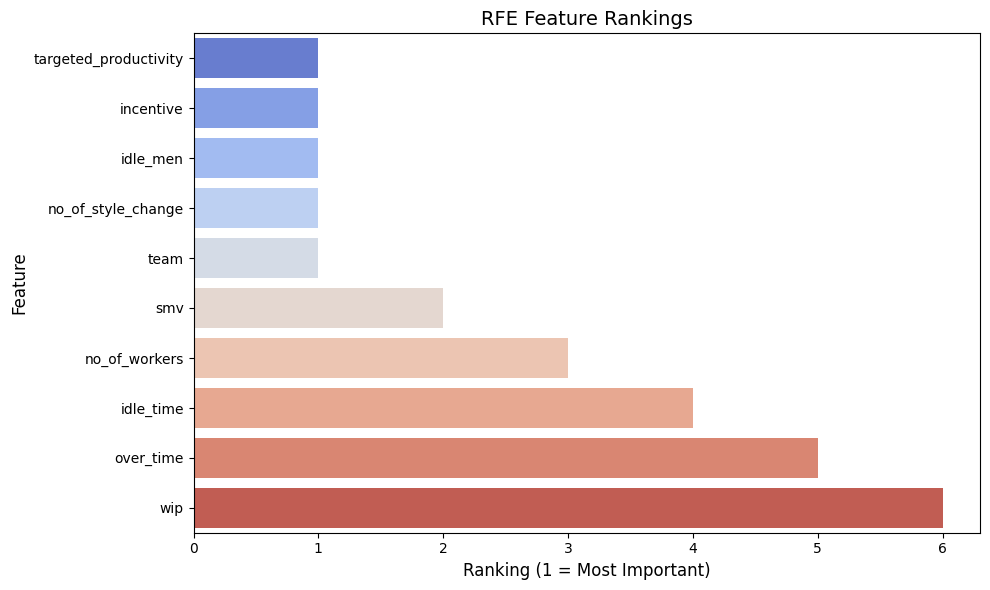

In [ ]:
# Visualization for correlation results

correlation_data = pd.Series({
    'incentive': 0.804149,
    'targeted_productivity': 0.697970,
    'wip': 0.131147,
    'is_weekend': 0.005487,
    'no_of_workers': 0.003378,
    'day_number': -0.012037,
    'over_time': -0.016875,
    'idle_time': -0.113737,
    'team': -0.125099,
    'smv': -0.155676,
    'idle_men': -0.258357,
    'no_of_style_change': -0.281686
})

def plot_correlation(correlation_data, title):
    correlation_sorted = correlation_data.sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=correlation_sorted.values, y=correlation_sorted.index, palette="mako")
    plt.title(title, fontsize=14)
    plt.xlabel("Correlation with Actual Productivity", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.tight_layout()
    plt.show()

# Visualization for Random Forest feature importance
def plot_feature_importance_rf(importances, title):
    importances_sorted = importances.sort_values(by="Importance", ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=importances_sorted, palette="viridis")
    plt.title(title, fontsize=14)
    plt.xlabel("Importance", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.tight_layout()
    plt.show()

# Visualization for RFE ranking
def plot_rfe_ranking(rfe_results, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Ranking", y="Feature", data=rfe_results.sort_values(by="Ranking"), palette="coolwarm")
    plt.title(title, fontsize=14)
    plt.xlabel("Ranking (1 = Most Important)", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.tight_layout()
    plt.show()

plot_correlation(correlation_data, "Correlation with Actual Productivity")

plot_feature_importance_rf(feature_importances, "Random Forest Feature Importance")

plot_rfe_ranking(rfe_results, "RFE Feature Rankings")
##### **** 7. referemces below

7. Matplotlib Development Team (2023). Choosing Colormaps in Matplotlib. Available at: https://matplotlib.org/stable/tutorials/colors/colormaps.html (Accessed: 24 November 2024).

### The Random Forest model shows that incentive (Importance=0.69) and targeted productivity (0.13) are the most critical drivers of productivity, while variables like wip (0.05) and idle men (0.02) have smaller but noticeable impacts. Idle time (0.0047) and style changes (0.0064) contribute minimally to improving productivity.

### The Recursive Feature Elimination (RFE) highlights targeted productivity, smv, incentive, idle men, and style changes as the most significant factors driving productivity. However, variables like over time, idle time, and wip, which were ranked lower, likely reduce productivity due to inefficiencies. Idle men and work in progress (wip) in particular seem to contribute negatively by signaling delays or bottlenecks in the process. Both methods confirm that reducing inefficiencies in these areas could help improve overall productivity.

In [ ]:

# I want to manully combine the Data to create one single ranking : Correlation, Random Forest Importance, and RFE Rankings
data = {
    'Feature': ['incentive', 'targeted_productivity', 'wip', 'smv', 'over_time',
                'no_of_workers', 'idle_men', 'no_of_style_change', 'idle_time', 'team'],
    'Correlation': [0.804149, 0.697970, 0.131147, -0.155676, -0.016875,
                    0.003378, -0.258357, -0.281686, -0.113737, -0.125099],
    'RF_Importance': [0.692793, 0.128611, 0.050786, 0.033192, 0.030059,
                      0.021050, 0.019103, 0.005677, 0.004553, 0.014175],
    'RFE_Rank': [1, 1, 6, 2, 5, 3, 1, 1, 4, 1]
}

# Creating DataFrame from combined infomation above.
df_combined = pd.DataFrame(data)

# I need to change correlaction to absolyte values and normalize Random Forest Importance so ranking 1 to 5 wont skew the cobined result
df_combined['Abs_Correlation'] = df_combined['Correlation'].abs()
df_combined['Normalized_RF'] = df_combined['RF_Importance'] / df_combined['RF_Importance'].max()

# Creating Rank based on combined values (inverse for ranks, higher for correlation and importance)
df_combined['Combined_Rank'] = (
    df_combined['Abs_Correlation'] +
    df_combined['Normalized_RF'] +
    (1 / df_combined['RFE_Rank'])
)

# Sort by Combined Rank
df_combined_sorted = df_combined.sort_values(by='Combined_Rank', ascending=False)

# this is combined  Feature Rank Number
df_final = df_combined_sorted[['Feature', 'Combined_Rank']].reset_index(drop=True)

# Now we have our variables sorted and displayed by the rank , the higher score the better. this rank looks very similar to RFE
print(df_final)


                 Feature  Combined_Rank
0              incentive       2.804149
1  targeted_productivity       1.883611
2     no_of_style_change       1.289880
3               idle_men       1.285931
4                   team       1.145560
5                    smv       0.703586
6                    wip       0.371120
7              idle_time       0.370309
8          no_of_workers       0.367096
9              over_time       0.260263


# This is combined rank of : Correlation, Random Forest Importance, and RFE Rankings. result of top 5 feature is the same as RFE , I am happy tu use those features in my final regressions model



1.   incentive
2.   targeted_productivity
3.   no_of_style_change
4.   idle_men
5.   team





In [ ]:
# This is my selcted top 5 features and target variable
top_5_features = ['incentive', 'targeted_productivity', 'team', 'idle_men','no_of_style_change']
X_top_5 = df[top_5_features]
y = df['actual_productivity']

# agian I will split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top_5, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr_model_top_5 = LinearRegression()
lr_model_top_5.fit(X_train, y_train)

# Predictions and Model Metrics
y_pred_top_5 = lr_model_top_5.predict(X_test)
mse_top_5 = mean_squared_error(y_test, y_pred_top_5)
r2_top_5 = r2_score(y_test, y_pred_top_5)

# Regression Coefficients and P-values
X_with_const_top_5 = sm.add_constant(X_top_5)
model_sm_top_5 = sm.OLS(y, X_with_const_top_5).fit()
results_top_5 = pd.DataFrame({
    'Predictor': ['Intercept'] + top_5_features,
    'Coefficient': model_sm_top_5.params.values,
    'P-value': model_sm_top_5.pvalues.values
})

# Format coefficients and p-values to be shown in normal numbers not (E+)
results_top_5['Coefficient'] = results_top_5['Coefficient'].map("{:.6f}".format)
results_top_5['P-value'] = results_top_5['P-value'].map("{:.6f}".format)

# showing results
print("Mean Squared Error (Top 5 Features):", mse_top_5)
print("R-squared (Top 5 Features):", r2_top_5)
print("\nRegression Results (Top 5 Features):")
print(results_top_5.sort_values(by='Coefficient'))

Mean Squared Error (Top 5 Features): 0.004364560166612665
R-squared (Top 5 Features): 0.7901295382966907

Regression Results (Top 5 Features):
               Predictor Coefficient   P-value
3                   team   -0.001187  0.143074
4               idle_men   -0.004368  0.000000
1              incentive    0.003267  0.000000
5     no_of_style_change    0.006571  0.228759
0              Intercept    0.131662  0.000000
2  targeted_productivity    0.626850  0.000000


### no_of_style_change  changes seems to have positive impact on productivity , while corealtion and first regression model showed negative , Alos High p-value shows low significance 0.228759, therfore accuracy of calcautions might be impcated.I will replace no_of_style_change  with next in combined rank 'smv'

In [ ]:
# This is my selcted top 5 features and target variable , The final version
final_top_5_features = ['incentive', 'targeted_productivity', 'smv', 'idle_men','team']
X_final_top_5 = df[final_top_5_features]
y_final = df['actual_productivity']

# agian I will split the dataset into training and testing sets
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final_top_5, y_final, test_size=0.2, random_state=42)

# Linear Regression Model
lr_model_final_top_5 = LinearRegression()
lr_model_final_top_5.fit(X_train_final, y_train_final)

# Predictions and Model Metrics
y_pred_final_top_5 = lr_model_final_top_5.predict(X_test_final)
mse_final_top_5 = mean_squared_error(y_test_final, y_pred_final_top_5)
r2_final_top_5 = r2_score(y_test_final, y_pred_final_top_5)

# Regression Coefficients and P-values
X_with_const_final_top_5 = sm.add_constant(X_final_top_5)
model_sm_final_top_5 = sm.OLS(y_final, X_with_const_final_top_5).fit()
results_final_top_5 = pd.DataFrame({
    'Predictor': ['Intercept'] + final_top_5_features,
    'Coefficient': model_sm_final_top_5.params.values,
    'P-value': model_sm_final_top_5.pvalues.values
})

# Format coefficients and p-values to be shown in normal numbers not (E+)
results_final_top_5['Coefficient'] = results_final_top_5['Coefficient'].map("{:.6f}".format)
results_final_top_5['P-value'] = results_final_top_5['P-value'].map("{:.6f}".format)

# showing results
print("Mean Squared Error (Final Top 5 Features):", mse_final_top_5)
print("R-squared (Final Top 5 Features):", r2_final_top_5)
print("\nRegression Results (Final Top 5 Features):")
print(results_final_top_5.sort_values(by='Coefficient'))

Mean Squared Error (Final Top 5 Features): 0.004044775487510634
R-squared (Final Top 5 Features): 0.8055064275333613

Regression Results (Final Top 5 Features):
               Predictor Coefficient   P-value
3                    smv   -0.002591  0.000000
5                   team   -0.003333  0.000105
4               idle_men   -0.004219  0.000000
1              incentive    0.003113  0.000000
0              Intercept    0.208731  0.000000
2  targeted_productivity    0.634627  0.000000


# The regression model explains 80.55% of the variance in actual productivity (R2=0.8055) and has a low mean squared error of 0.0040, indicating good predictive accuracy. Targeted productivity and incentive positively influence productivity, while idle men, team, and SMV negatively affect it. All predictors are statistically significant, making this a acurate model. Also model accuracy improved by dropping no_of_style_change

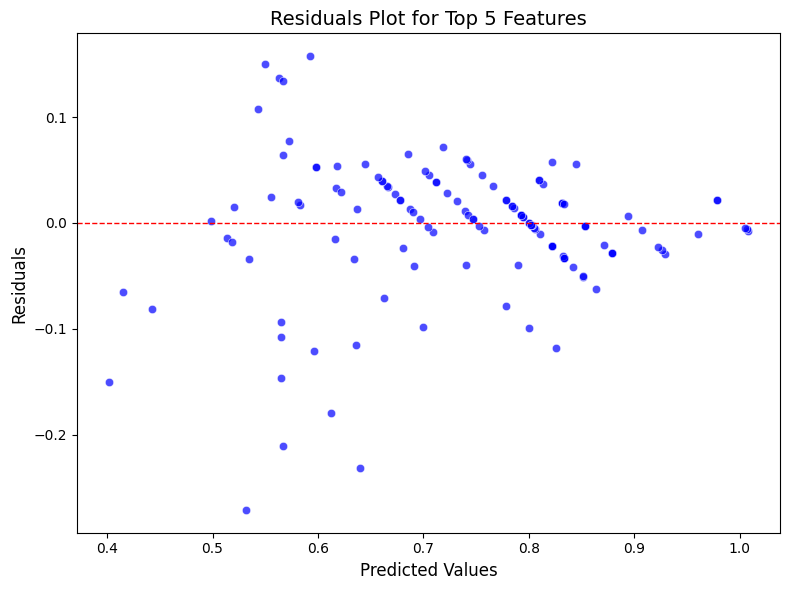

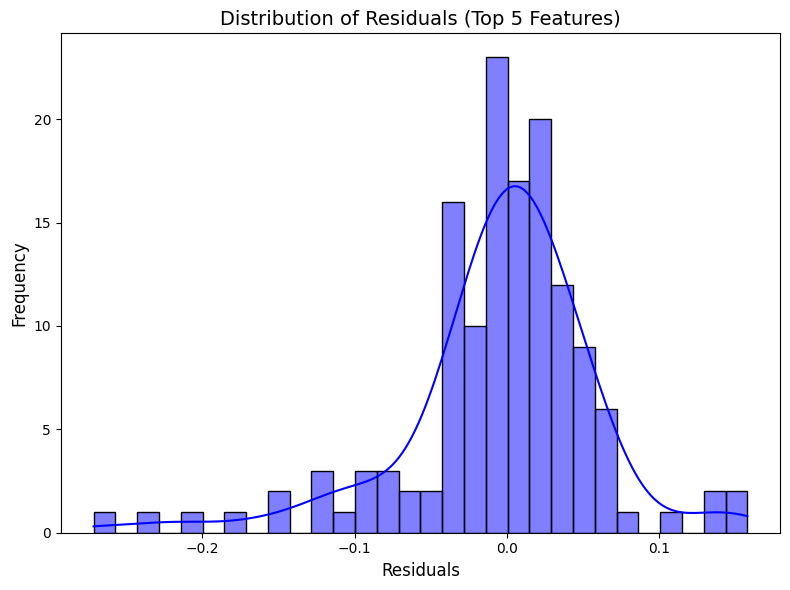

In [ ]:
# Residuals for Top 5 Features Regression
residuals_top_5 = y_test_final - y_pred_final_top_5

# Residuals Plot for Top 5 Features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_final_top_5, y=residuals_top_5, alpha=0.7, color="blue")
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals Plot for Top 5 Features", fontsize=14)
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.tight_layout()
plt.show()

# Histogram of Residuals for Top 5 Features
plt.figure(figsize=(8, 6))
sns.histplot(residuals_top_5, kde=True, color="blue", bins=30)
plt.title("Distribution of Residuals (Top 5 Features)", fontsize=14)
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

#### **** 8. references below

8. Scikit-learn (2023). 3.3. Metrics and scoring: quantifying the quality of predictions. Available at: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [ ]:
# as we coudl see based on linear regression , productivity drops witht when the team number increases , I want to sort it and have quick looks at each team productivity and use it as an example of linear regression limiation
team_productivity_overtime = df.groupby('team')[['actual_productivity', 'over_time']].mean().reset_index().sort_values(by='actual_productivity', ascending=False)

print(team_productivity_overtime)

    team  actual_productivity    over_time
0      1             0.815150  7335.535714
2      3             0.776163  7035.000000
11    12             0.770054  4490.423729
1      2             0.762394  6575.789474
8      9             0.742341  7103.793103
3      4             0.730577  7547.796610
5      6             0.719471  4461.610169
9     10             0.716959  6794.210526
10    11             0.676165  5665.423729
7      8             0.656631  6896.785714
6      7             0.654707  7064.181818
4      5             0.641486  7271.379310


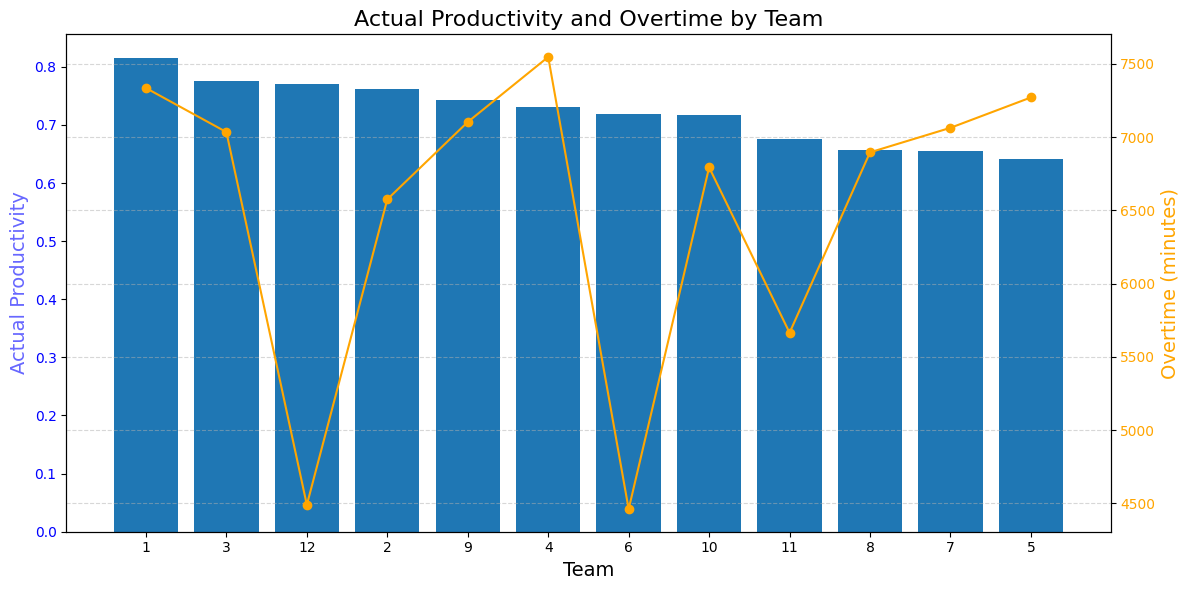

In [ ]:
# I know that there is no relation between productivity and overtime , however i created Combined plot Productivity and Overtime by Team , to use it in my report , alos to discus linear regression limitations
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar for actual productivity
ax1.bar(team_productivity_overtime['team'].astype(str), team_productivity_overtime['actual_productivity'], label='Actual Productivity')
ax1.set_xlabel('Team', fontsize=14)
ax1.set_ylabel('Actual Productivity', color='blue', alpha=0.6, fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')

# Line for overtime
ax2 = ax1.twinx()
ax2.plot(team_productivity_overtime['team'].astype(str), team_productivity_overtime['over_time'], color='orange', marker='o', label='Overtime')
ax2.set_ylabel('Overtime (minutes)', color='orange', fontsize=14)
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Actual Productivity and Overtime by Team', fontsize=16)
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
#### **** 9,10,11. referecnes below

9. Matplotlib Development Team (2023). matplotlib.axes.Axes.set_ylabel and matplotlib.axes.Axes.tick_params. Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html and https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html (Accessed: 9 dec 2024).
10. Matplotlib Development Team (2023). matplotlib.axes.Axes.twinx. Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html (Accessed: 9 dec 2024).
11. Matplotlib Development Team (2023). matplotlib.axes.Axes.plot. Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html (Accessed: 09 dec 2024).



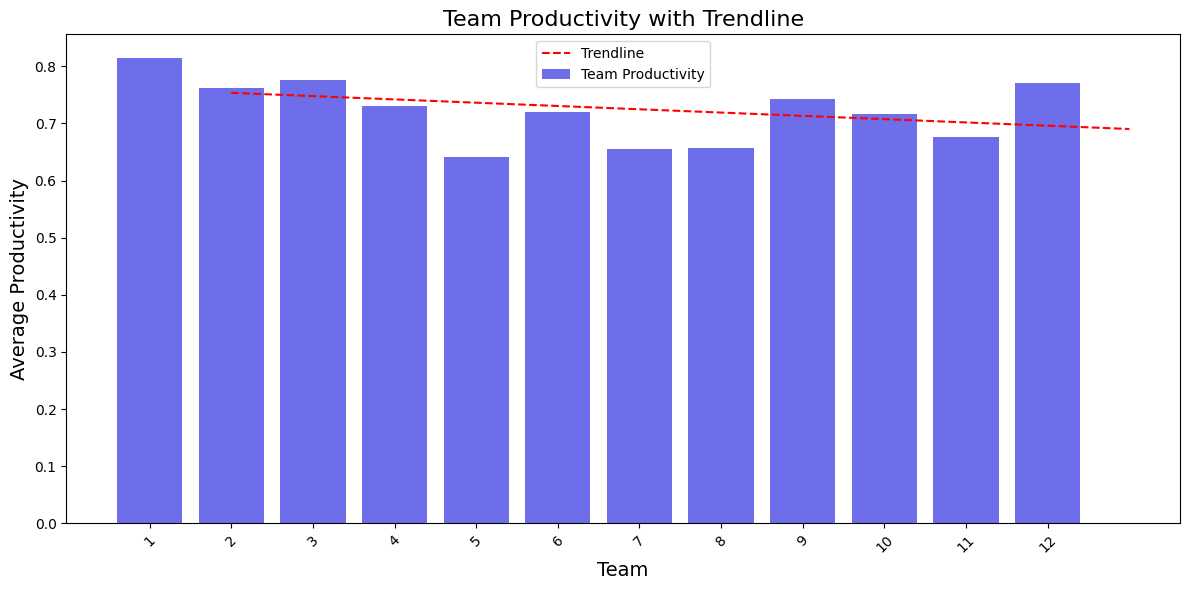

In [ ]:
# I want to show productivity for each team , to do so I need to group data by team and calculate average productivity.
team_productivity_trend = df.groupby('team')['actual_productivity'].mean().reset_index()

plt.figure(figsize=(12, 6))

# Bar chart for productivity
sns.barplot(x='team', y='actual_productivity', data=team_productivity_trend, color='blue', alpha=0.65, label='Team Productivity')

# adding trendline to chart
z = np.polyfit(team_productivity_trend['team'], team_productivity_trend['actual_productivity'], 1)
p = np.poly1d(z)
plt.plot(team_productivity_trend['team'], p(team_productivity_trend['team']), color='red', linestyle='--', label='Trendline')

plt.title('Team Productivity with Trendline', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Average Productivity', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()